## Exercises

1. Ask ChatGPT to write a 150-200 word summary on an application of percolation theory and then comment/evaluate this answer in your own words in 3-4 sentences based on what you have learned in class. Please also copy the ChatGPT output into the notebook.

Percolation theory, a branch of statistical physics, finds applications in various fields, including material science, geology, computer science, and network analysis. It deals with the study of how liquids or gases flow through porous materials or networks. One significant application of percolation theory lies in understanding the behavior of complex systems and predicting their critical properties.

For instance, in materials science, percolation theory helps explain the formation and properties of composite materials, such as metal alloys, where the distribution of different components affects their conductivity or strength. By modeling the percolation process, scientists can predict the point at which the material transitions from an insulator to a conductor or from a weak to a strong material.

In geology, percolation theory plays a crucial role in studying the movement of water through porous rocks or soil. It aids in predicting phenomena like groundwater flow, oil and gas reservoir behavior, and the spread of pollutants through aquifers. Understanding percolation processes helps scientists and engineers make informed decisions regarding resource management, environmental remediation, and hazard assessment.

Moreover, percolation theory finds application in computer science and network analysis. It can be used to analyze the robustness and resilience of complex networks, such as transportation systems, power grids, or social networks. By studying percolation properties, researchers can identify critical nodes or links whose removal can cause system-wide failures, thus informing strategies for network design and optimization.

In summary, percolation theory provides a versatile framework for understanding and predicting the behavior of complex systems characterized by the flow or connectivity of materials or information. Its applications span various disciplines, enabling scientists and engineers to make informed decisions and design efficient and reliable systems.

MY OWN WORDS:

The provided answer offers a concise and informative summary of the applications of percolation theory. It effectively highlights the diverse fields where percolation theory finds relevance, such as material science, geology, computer science, and network analysis. The explanation of how percolation theory aids in understanding critical properties and predicting transitions in complex systems is clear and comprehensible. Overall, the answer demonstrates a good understanding of the topic and provides a comprehensive overview of the applications of percolation theory.

2. Implement Hoshen-Kopelman-Algorithm

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import seaborn as sns


# hoshen-kopelman algorithm
@njit
def hoshen_kopelman(img):
    labels = np.zeros_like(img, dtype=np.int32)
    next_label = 1

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] != 0:
                left = labels[i, j - 1] if j > 0 else 0
                up = labels[i - 1, j] if i > 0 else 0

                if left == up == 0:
                    labels[i, j] = next_label
                    next_label += 1
                elif left != 0 and up == 0:
                    labels[i, j] = left
                elif up != 0 and left == 0:
                    labels[i, j] = up
                elif up == left != 0:
                    labels[i, j] = up
                elif up != left != 0:
                    smaller_label = min(up, left)
                    find_set(labels, i-1, j, smaller_label)
                    find_set(labels, i, j-1, smaller_label)
                    labels[i, j] = smaller_label
    return labels

@njit
def find_set(labels, i, j, label):
    """
    DO NOT MODIFY THIS FUNCTION
    set the element labels[i, j] as label, and also set the other sites which belong to
    the same cluster with labels[i, j] before as label.
    """
    old_label = labels[i, j]
    labels[i, j] = label
    if i - 1 >= 0 and labels[i - 1, j] == old_label and labels[i - 1, j] != label:
        find_set(labels, i - 1, j, label)
    if i + 1 < labels.shape[0] and labels[i + 1, j] == old_label and labels[i + 1, j] != label:
        find_set(labels, i + 1, j, label)
    if j - 1 >= 0 and labels[i, j - 1] == old_label and labels[i, j - 1] != label:
        find_set(labels, i, j - 1, label)
    if j + 1 < labels.shape[1] and labels[i, j + 1] == old_label and labels[i, j + 1] != label:
        find_set(labels, i, j + 1, label)

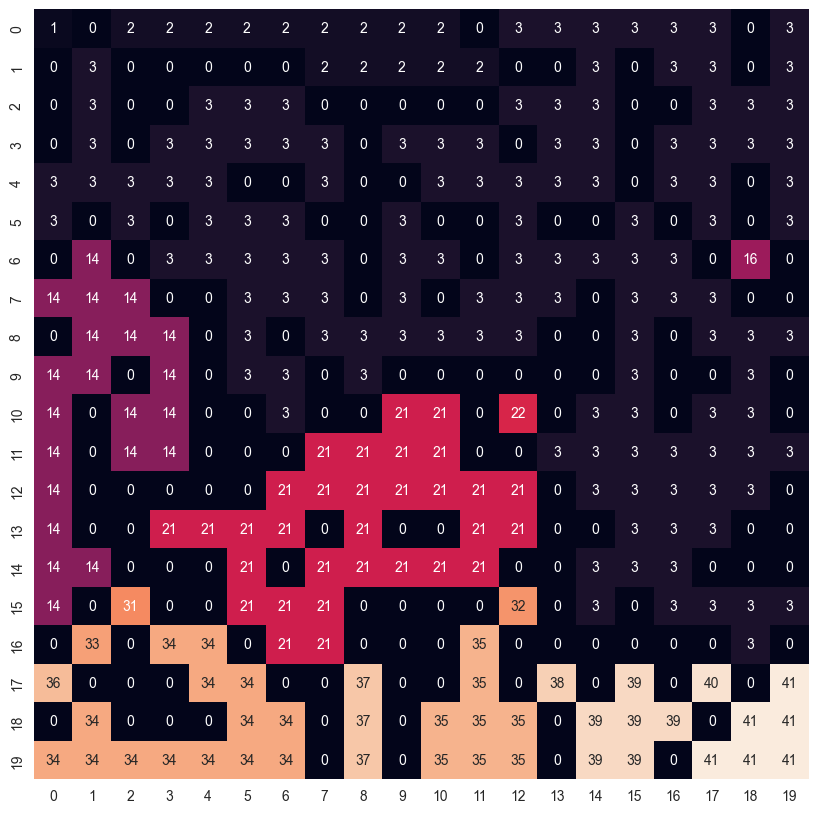

In [32]:
# for testing Hoshen-Kopelman-Algorithm
N = 20
p = 0.6
m = np.random.rand(N, N)
m = (m < p).astype(int)

labels = hoshen_kopelman(m)
plt.figure(figsize=(10, 10))
sns.heatmap(labels, annot=labels, cbar=False)
plt.show()

3. How does the mass, or number of sites M(L) of the largest cluster grow with size L of the lattice? Reproduce the figure on slide 13. Also apply a polynomial fit to determine the $d_f$

when p = $p_c$ and p > $p_c$

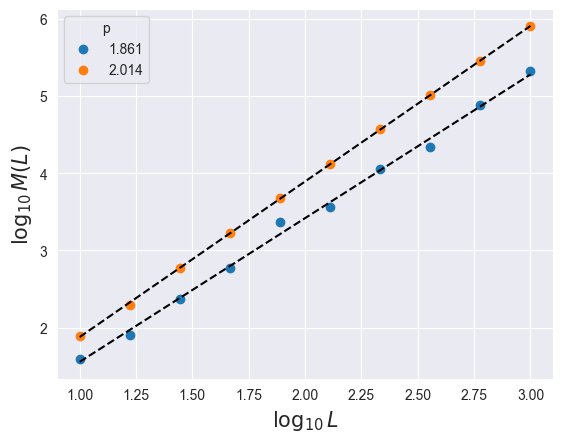

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def get_max_cluster_size_distribution(ps, L):
    M_L = np.zeros(len(L))
    for i, l in enumerate(L):
        avg = np.zeros(10)
        for j in range(10):
            m = (np.random.rand(int(l), int(l)) < ps).astype(int)
            lm, num = ndimage.label(m)
            size = ndimage.sum(m, lm, index=range(num + 1))
            avg[j] = max(size)
        M_L[i] = np.average(avg)
    return M_L

def plot_cluster_size_distribution(ps, L):
    slopes = []
    for p in ps:
        M_L = get_max_cluster_size_distribution(p, L)
        logL = np.log10(L)
        logM_L = np.log10(M_L)

        coef = np.polyfit(logL, logM_L, deg = 1)
        fit = coef[1] + logL * coef[0]

        slopes.append(coef[0])

        plt.plot(logL, logM_L, 'o', label=f'{coef[0]:.3f}')
        plt.plot(logL, fit, 'k--')

    plt.xlabel(r"$\log_{10}L$", fontsize=15)
    plt.ylabel(r"$\log_{10}M\left(L\right)$", fontsize=15)
    plt.legend(title='p')

L = np.logspace(1, 3, num=10)
ps = [0.593, 0.8]

plot_cluster_size_distribution(ps, L)
plt.show()


when p < $p_c$

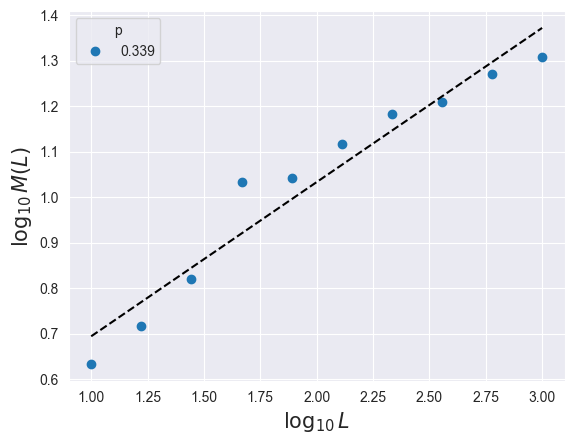

In [34]:
L = np.logspace(1, 3, num=10)
ps = [0.2]

plot_cluster_size_distribution(ps, L)
plt.show()

4. NOTE: NO CODE IS REQUIRED IN THIS QUESTION

(a) Renormalization on triangular lattice

Try to find out $p_c$ by using renormalization. Compare your result with the real Percolation threshold. You can find the real value from : https://en.wikipedia.org/wiki/Percolation_threshold


|![triangular lattice](https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/img/percolation/tra_percolation.png?raw=True)|
|:-:|
|*triangular lattice*|

|![triangular lattice](https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/img/percolation/tra_percolation_cg.png?raw=True)|
|:-:|
|*coarse graining rule for triangular lattice*|



We aim to ascertain the probability of attaining one of the first four configurations, as depicted in the lecture image. Given that the probability of filling any of the hexagons is $p$, we derive the probability of acquiring the first four configurations as follows:

Start with: $p^{3}+3\cdot p^{2}(1-p)$

This simplifies to: $p^{3}+3p^{2}-3p^{3}$

Further reducing, we get: $3p^{2}-2p^{3}$

Subsequently, we wish to find the solutions to the following equation: $p=3p^{2}-2p^{3}$

On simplification, this leads to:

$2p^{3}-3p^{2}+p=0$

$=> p(p^{2}-\frac{3}{2}p+\frac{1}{2})=0$

$=> p(p-1)(p-\frac{1}{2})=0$

From which we derive the solutions: $p_{1}=0$, $p_{2}=1$, $p_{3}=\frac{1}{2}$

Of course, the most intriguing solution is the non-trivial one, i.e., it should neither be 0 nor 1. This leaves us with the solution $p_{c}=\frac{1}{2}$.

b) Renormalization on boundary

For applying coarse graining on the bond percolation, you just need to focus on the 'H' shape

![example of percolation](https://github.com/AlexMa123/BIU_Computational_physics_2023/blob/main/figs/Bond_percolation.png?raw=true)

***try to write down the renormalization group function and find out the $p_c$***

> To write the renormalization group function, all you need to focus on are the cases where the top nodes are connected with the bottom nodes. During the coarse-grain step, 5 bonds will be condensed into a single bond.

>Here are examples (Not all the cases) that you will connect the nodes after coarse-grain:

>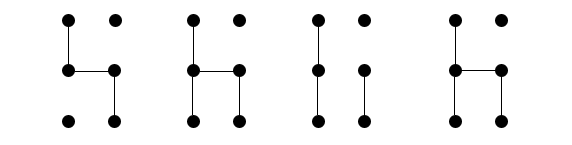

>And examples (Not all the cases) not considered as connected

>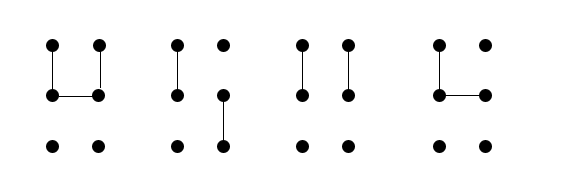

Now, we repeat the same procedure but for the "H" shape. We assume each of the five connectors has a $p$ probability, and we evaluate the probability of the bottom layer being connected to the top one. For this to occur, one of the following must happen:

All the connectors appear.
Any 4 out of the 5 connectors appear, giving us 5 possibilities.
3 out of the 5 connectors appear. However, not just any three - if the bottom two or the top two are missing, there won't be a connection. This leaves us with 8 possibilities (5 choose 3, which is 10, minus 2).
If only 2 lines appear, there are only 2 possibilities - either the two right lines or the two on the left.
Only one line (and of course zero) can't create a connected H shape.
The cumulative probability of these options can be expressed by this equation:

$p^{5}+5\cdot p^{4}(1-p)+8\cdot p^{3}(1-p)^{2}+2\cdot p^{2}(1-p)^{3}$

If we set this probability equal to $p$ itself, we obtain:

$2p^{5}-5p^{4}+2p^{3}+2p^{2}-p=0$

Notably, we're aware that 0 and 1 can be solutions, but we are not interested in these. Initially, we can divide everything by $p$ to get:

$2p^{4}-5p^{3}+2p^{2}+2p-1=0$

This polynomial must be divisible by $p-1$, and indeed it is:

$2p^{4}-5p^{3}+2p^{2}+2p-1=(p-1)(2p^{3}-3p^{2}-p+1)$

Therefore, we can divide again and solve for $2p^{3}-3p^{2}-p+1$. Though it may initially appear difficult to solve this equation analytically, we can utilize WolframAlpha to find the solutions:

$p_{1}=\frac{1-\sqrt{5}}{2}$, $p_{2}=\frac{1}{2}$, $p_{3}=\frac{1+\sqrt{5}}{2}$

At first glance, it might seem like there are three solutions - but we must remember that we are seeking a probability, so solutions below 0 or above 1 are invalid, which leaves us with our solution:

$p_{c}=\frac{1}{2}$

Interestingly, this is the same result we obtained in the first section.




